In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix,classification_report

import numpy as np

In [3]:
df=pd.read_csv('/content/sample_data/BankNote_Authentication.csv')

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
fake_notes=(df['class']==0).sum()
total_records=(df['class']==1).sum()
print(0,fake_notes)
print(1,total_records)

0 762
1 610


In [8]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


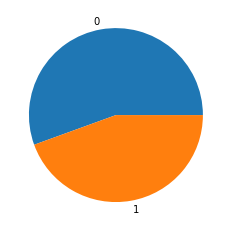

In [9]:


types=df['class'].value_counts().index
count=df['class'].value_counts()
plt.pie(count,labels=types)
plt.show()

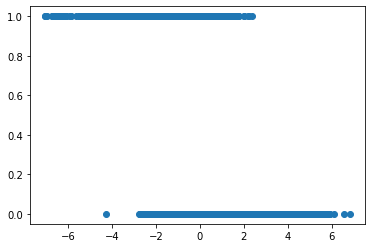

In [10]:
#df['variance'].plot()
#plt.xlabel("variance")
#plt.ylabel('class')
#plt.title('varance Vs Class')
plt.scatter(df['variance'],df['class'])


(array([ 21.,  41., 112., 220., 200., 230., 183., 214., 131.,  20.]),
 array([-7.0421 , -5.65541, -4.26872, -2.88203, -1.49534, -0.10865,
         1.27804,  2.66473,  4.05142,  5.43811,  6.8248 ]),
 <a list of 10 Patch objects>)

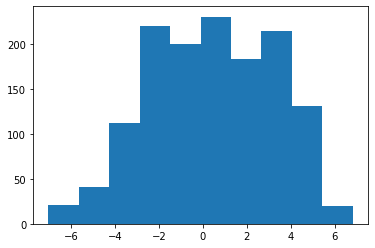

In [11]:
plt.hist(df['variance'])

(array([ 30.,  37., 100., 128., 113., 272., 247., 162., 209.,  74.]),
 array([-13.7731 , -11.10063,  -8.42816,  -5.75569,  -3.08322,  -0.41075,
          2.26172,   4.93419,   7.60666,  10.27913,  12.9516 ]),
 <a list of 10 Patch objects>)

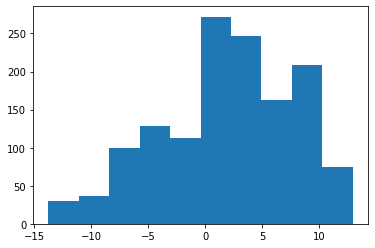

In [12]:
plt.hist(df['skewness'])

(array([198., 257., 391., 224., 116.,  84.,  56.,  25.,   7.,  14.]),
 array([-5.2861 , -2.96475, -0.6434 ,  1.67795,  3.9993 ,  6.32065,
         8.642  , 10.96335, 13.2847 , 15.60605, 17.9274 ]),
 <a list of 10 Patch objects>)

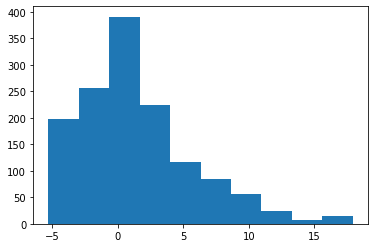

In [13]:
plt.hist(df['curtosis'])

(array([ 16.,  25.,  35.,  72., 124., 120., 220., 363., 343.,  54.]),
 array([-8.5482 , -7.44843, -6.34866, -5.24889, -4.14912, -3.04935,
        -1.94958, -0.84981,  0.24996,  1.34973,  2.4495 ]),
 <a list of 10 Patch objects>)

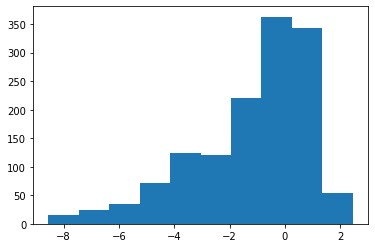

In [14]:
plt.hist(df['entropy'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb211013a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb211017a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb21101ea90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb21101e550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb211013fd0>,
  <matplotlib.lines.Line2D at 0x7fb211017510>]}

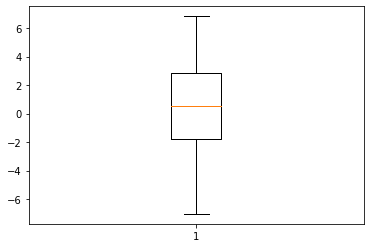

In [15]:
plt.boxplot(df['variance'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb210f7fa10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb210f88a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb210f8da90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb210f8d550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb210f7ff90>,
  <matplotlib.lines.Line2D at 0x7fb210f88510>]}

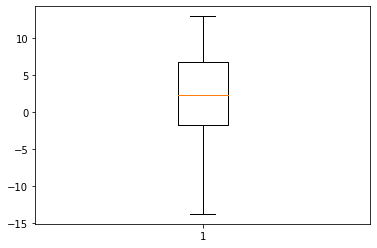

In [16]:
plt.boxplot(df['skewness'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb210eee390>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb210ef53d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb210efc410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb210ef5e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb210eee910>,
  <matplotlib.lines.Line2D at 0x7fb210eeee50>]}

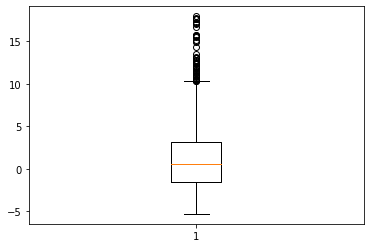

In [17]:
plt.boxplot(df['curtosis'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb210edc610>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb210e62650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb210e68690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb210e68150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb210edcb90>,
  <matplotlib.lines.Line2D at 0x7fb210e62110>]}

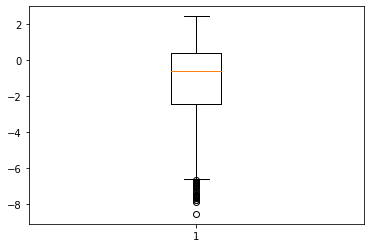

In [18]:
plt.boxplot(df['entropy'])

In [19]:
target=df['class']
features=df.drop('class',axis=1)
features

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [20]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['variance', 'skewness', 'curtosis', 'entropy']
scaler = MinMaxScaler()
features[numerical] = scaler.fit_transform(features[numerical])
features.head()

,variance,skewness,curtosis,entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state = 5)

In [23]:
print(X_train.shape)
print(X_test.shape)

(823, 4)
(549, 4)


In [24]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
accuracy=fake_notes/total_records
precision = accuracy
recall = 1
beta = 2
fscore = (1 + beta ** 2) * precision * recall /(beta ** 2 * precision + recall)
print(accuracy,fscore)

1.2491803278688525 1.041552761071624


In [26]:
model = Sequential()

In [27]:
model.add(Dense(4,input_dim = 4,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [28]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [73]:
history=model.fit(scaled_X_train,y_train,epochs = 50,verbose = 2)

Epoch 1/50
26/26 - 0s - loss: 0.2733 - accuracy: 0.9028
Epoch 2/50
26/26 - 0s - loss: 0.2736 - accuracy: 0.9040
Epoch 3/50
26/26 - 0s - loss: 0.2779 - accuracy: 0.9016
Epoch 4/50
26/26 - 0s - loss: 0.2752 - accuracy: 0.8991
Epoch 5/50
26/26 - 0s - loss: 0.2730 - accuracy: 0.9077
Epoch 6/50
26/26 - 0s - loss: 0.2740 - accuracy: 0.9052
Epoch 7/50
26/26 - 0s - loss: 0.2788 - accuracy: 0.9004
Epoch 8/50
26/26 - 0s - loss: 0.2755 - accuracy: 0.9016
Epoch 9/50
26/26 - 0s - loss: 0.2764 - accuracy: 0.8979
Epoch 10/50
26/26 - 0s - loss: 0.2799 - accuracy: 0.9004
Epoch 11/50
26/26 - 0s - loss: 0.2777 - accuracy: 0.8979
Epoch 12/50
26/26 - 0s - loss: 0.2745 - accuracy: 0.9028
Epoch 13/50
26/26 - 0s - loss: 0.2743 - accuracy: 0.9064
Epoch 14/50
26/26 - 0s - loss: 0.2742 - accuracy: 0.9016
Epoch 15/50
26/26 - 0s - loss: 0.2743 - accuracy: 0.9016
Epoch 16/50
26/26 - 0s - loss: 0.2738 - accuracy: 0.9028
Epoch 17/50
26/26 - 0s - loss: 0.2738 - accuracy: 0.9052
Epoch 18/50
26/26 - 0s - loss: 0.2764 - 

In [74]:
predictions = model.predict_classes(scaled_X_test)
predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [75]:
confusion_matrix(y_test,predictions)

array([[263,  32],
       [ 32, 222]])

In [76]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       295
           1       0.87      0.87      0.87       254

    accuracy                           0.88       549
   macro avg       0.88      0.88      0.88       549
weighted avg       0.88      0.88      0.88       549



In [77]:
loss_train = history.history['train_loss']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

KeyError: ignored

In [78]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: ignored